<a href="https://colab.research.google.com/github/sammyamajumdar/my_website/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import colorsys
import matplotlib.pyplot as plt

In [ ]:
X = np.random.normal(size=[200,4])
X.shape

(200, 4)

In [ ]:
# Q1.b

mn = np.zeros((200,1))
mx = np.zeros((200,1))
avg = np.zeros((200,1))

for row in range(X.shape[0]): 
    mn[row] = np.amin(X[row])
    mx[row] = np.amax(X[row])
    avg[row] = np.sum(X[row]) / X.shape[1]

print(mn[:4])

[[-1.28759318]
 [-0.37891245]
 [-1.5022527 ]
 [-0.3239928 ]]


Text(0, 0.5, 'Count')

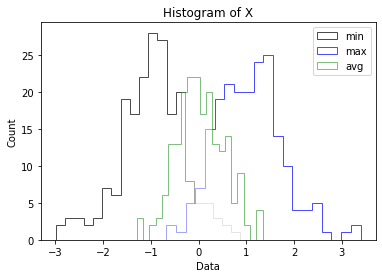

In [ ]:
# Q 1.c

fig, axs = plt.subplots()
n_bins=20

axs.hist(mn, histtype='stepfilled',bins=n_bins, alpha=0.7, color='white', ec='black')
axs.hist(mx, histtype='stepfilled', bins=n_bins, alpha=0.7, color='white', ec='blue')
axs.hist(avg, histtype='stepfilled', bins=n_bins, alpha=0.5, color='white', ec='green')
axs.legend(['min', 'max', 'avg'], loc='upper right')
axs.set_title('Histogram of X')
axs.set_xlabel('Data')
axs.set_ylabel('Count')

In [ ]:
# Q1.d

numpts = 0
num_count = 0

for row in X: 
    for col in row: 
        if np.absolute(col) < 0.6: 
            num_count += 1
    if num_count == 4: 
        numpts += 1
print(numpts)

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


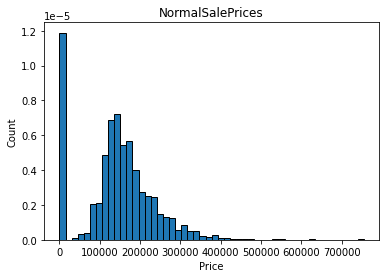

In [4]:
# Q2.a

path_housing = '/content/housing.csv'
path_unemployment = '/content/unemployment.csv'

# Q2.b
housing = pd.read_csv(path_housing)
housing_new = housing.dropna(axis=1)


#Q 2.c
housing_new['NormalSalePrices'] = housing_new.apply(lambda x: x.loc['SalePrice'] if x.loc['SaleCondition']=='Normal' else 0, axis=1)


axes = housing_new.hist('NormalSalePrices', bins=50, density=True,  grid=False, ec='black')
for ax in axes.flatten():
    ax.set_xlabel('Price')
    ax.set_ylabel('Count')

In [5]:
housing_new.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,NormalSalePrices
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,250000


In [6]:
# Q2.d

eight_max = housing_new['SalePrice'].where(housing_new['YrSold']==2008).dropna().max()
eight_min = housing_new['SalePrice'].where(housing_new['YrSold']==2008).dropna().min()
eight_mean = housing_new['SalePrice'].where(housing_new['YrSold']==2008).dropna().mean()

nine_max = housing_new['SalePrice'].where(housing_new['YrSold']==2009).dropna().max()
nine_min = housing_new['SalePrice'].where(housing_new['YrSold']==2009).dropna().min()
nine_mean = housing_new['SalePrice'].where(housing_new['YrSold']==2009).dropna().mean()

six_max = housing_new['SalePrice'].where(housing_new['YrSold']==2006).dropna().max()
six_min = housing_new['SalePrice'].where(housing_new['YrSold']==2006).dropna().min()
six_mean = housing_new['SalePrice'].where(housing_new['YrSold']==2006).dropna().mean()

seven_max = housing_new['SalePrice'].where(housing_new['YrSold']==2007).dropna().max()
seven_min = housing_new['SalePrice'].where(housing_new['YrSold']==2007).dropna().min()
seven_mean = housing_new['SalePrice'].where(housing_new['YrSold']==2007).dropna().mean()

ten_max = housing_new['SalePrice'].where(housing_new['YrSold']==2010).dropna().max()
ten_min = housing_new['SalePrice'].where(housing_new['YrSold']==2010).dropna().min()
ten_mean = housing_new['SalePrice'].where(housing_new['YrSold']==2010).dropna().mean()

value_arr = np.array([[six_max, six_min, six_mean],
                     [seven_max, seven_min, seven_mean],
                     [eight_max, eight_mean, eight_mean],
                     [nine_max, nine_min, nine_mean],
                     [ten_max, ten_min, ten_mean]])


summary = pd.DataFrame(data=value_arr,
                       index=[2006,2007,2008,2009,2010],
                       columns=['Maximum', 'Minimum', 'Mean'])

summary

,Maximum,Minimum,Mean
2006,625000.0,35311.000000,182549.458599
2007,755000.0,39300.000000,186063.151976
2008,446261.0,177360.838816,177360.838816
2009,582933.0,34900.000000,179432.103550
2010,611657.0,55000.000000,177393.674286


Text(0.5, 1.0, 'Bar chart for max,min,mean price by YrSold')

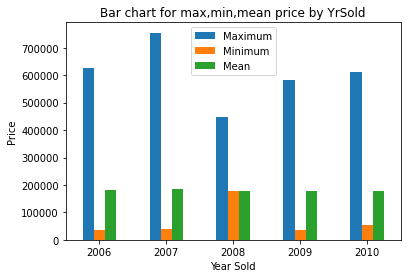

In [7]:
# Q2.e
ax = summary.plot.bar(rot=0)
ax.set_xlabel('Year Sold')
ax.set_ylabel('Price')
ax.set_title('Bar chart for max,min,mean price by YrSold')

In [8]:
# Q3.a
unemp = pd.read_csv(path_unemployment)
unemp = unemp.drop([0, 1])
unemp = unemp.replace('..', 0)
unemp['Date'] = pd.to_datetime(unemp['Date'], infer_datetime_format=True, format='%m-%y')
for item in unemp.columns[1:]: 
    unemp[item] = pd.to_numeric(unemp[item])
unemp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2 to 10
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             9 non-null      datetime64[ns]
 1   Australia        9 non-null      float64       
 2   Austria          9 non-null      float64       
 3   Belgium          9 non-null      float64       
 4   Canada           9 non-null      float64       
 5   Chile            9 non-null      float64       
 6   Colombia         9 non-null      float64       
 7   Czech Republic   9 non-null      float64       
 8   Denmark          9 non-null      float64       
 9   Estonia          9 non-null      float64       
 10  Finland          9 non-null      float64       
 11  France           9 non-null      float64       
 12  Germany          9 non-null      float64       
 13  Greece           9 non-null      float64       
 14  Hungary          9 non-null      float64     

In [9]:
# Q3.b
unemp = unemp.set_index('Date')
unemp

,Australia,Austria,Belgium,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia,Finland,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,5.1,4.2,5.2,5.6,7.8,10.3,2.0,4.9,4.4,6.8,...,2.9,6.7,5.6,3.8,13.7,6.6,0,13.1,3.7,3.5
2020-01-01,5.3,4.4,5.1,5.5,8.1,10.6,2.0,4.9,4.7,6.8,...,3.0,6.8,6.1,4.2,13.8,7.2,0,12.6,3.9,3.6
2020-02-01,5.1,4.4,5.0,5.6,8.2,10.8,2.0,4.9,4.7,6.9,...,3.0,6.4,6.1,4.2,13.6,7.6,0,12.6,3.9,3.5
2020-03-01,5.2,4.6,5.1,7.8,9.1,12.2,2.1,4.8,4.8,7.0,...,3.0,6.2,5.8,4.3,14.5,6.8,0,12.9,3.8,4.4
2020-04-01,6.4,4.7,5.3,13.0,10.9,20.2,2.2,4.9,6.0,7.2,...,3.1,6.3,6.4,4.7,15.3,7.9,0,13.6,3.9,14.7
2020-05-01,7.1,5.5,5.4,13.7,11.8,21.2,2.4,5.5,7.0,7.4,...,3.3,5.9,6.5,4.8,15.4,8.5,0,14.0,3.8,13.3
2020-06-01,7.4,5.4,5.5,12.3,12.4,20.8,2.7,6.0,8.0,7.6,...,3.3,7.3,6.6,4.8,15.8,9.2,0,0.0,0.0,11.1
2020-07-01,7.5,5.2,5.5,10.9,0.0,19.7,2.7,6.0,0.0,7.8,...,3.2,8.1,6.8,4.7,15.8,9.2,0,0.0,0.0,10.2
2020-08-01,0.0,0.0,0.0,10.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,8.4


Text(0.5, 1.0, 'Unemployment by country')

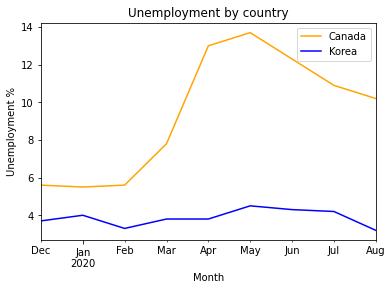

In [10]:
# Q3.c 
# Sadly, no idea why the year only appears under Jan; could be a datetime formatting issue! ,,,,,,,,,,
line_plot = pd.DataFrame({
   'Canada': unemp['Canada'],
   'Korea': unemp['Korea']
   }, index = unemp.index)
lines = line_plot.plot.line(color={"Canada": "orange", "Korea": "blue"})
lines.set_ylabel('Unemployment %')
lines.set_xlabel('Month')
lines.set_title('Unemployment by country')

In [20]:
# Q3.d
def create_colors(N): 
    colors = []
    # taking 20% difference of hue through N
    hue_space = 0.2
    hue = 0
    sat = 1.0
    lum = 1.0 
    for i in range(N): 
        hue += hue_space
        colors.append(colorsys.hsv_to_rgb(hue, sat, lum))
    return colors 
create_colors(4)

[(1.0, 0.8400000000000001, 0.0),
 (0.31999999999999984, 1.0, 0.0),
 (0.0, 1.0, 0.5200000000000005),
 (0.0, 0.6399999999999997, 1.0)]

In [38]:
# Q3.e
country_index = []
chars = ['A', 'B', 'C', 'D', 'E']
for item in unemp.columns: 
    chars_item = list(item)
    if chars_item[0] in chars: 
        country_index.append(item)
country_index


temp_unemp = pd.DataFrame(data=
                         np.array([unemp[item] for item in country_index]), 
                         columns=country_index)

lines = temp_unemp.plot.line(color=create_colors(len(country_index)))
lines.set_ylabel('Unemployment %')
lines.set_xlabel('Month')
lines.set_title('Unemployment by country')

In [39]:
temp_unemp

,Australia,Austria,Belgium,Canada,Chile,Colombia,Czech Republic,Denmark,Estonia
0,5.1,5.3,5.1,5.2,6.4,7.1,7.4,7.5,0.0
1,4.2,4.4,4.4,4.6,4.7,5.5,5.4,5.2,0.0
2,5.2,5.1,5.0,5.1,5.3,5.4,5.5,5.5,0.0
3,5.6,5.5,5.6,7.8,13.0,13.7,12.3,10.9,10.2
4,7.8,8.1,8.2,9.1,10.9,11.8,12.4,0.0,0.0
5,10.3,10.6,10.8,12.2,20.2,21.2,20.8,19.7,0.0
6,2.0,2.0,2.0,2.1,2.2,2.4,2.7,2.7,0.0
7,4.9,4.9,4.9,4.8,4.9,5.5,6.0,6.0,0.0
8,4.4,4.7,4.7,4.8,6.0,7.0,8.0,0.0,0.0


Text(0.5, 1.0, 'Unemployment by country')

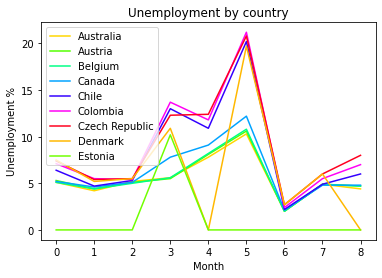